In [1]:
# Import libraries
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder


In [2]:
# Load the dataframe
data = pd.read_csv('loan_approval_dataset.csv')

In [3]:
data.head(10)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved
9,10,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected


In [4]:
data.shape

(4269, 13)

In [5]:
data.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [6]:
# Remove leading spaces from column names
data.rename(columns=lambda x: x.strip(), inplace=True)

# Drop loan_id column as this is not needed
data.drop(columns=['loan_id'], inplace=True)

In [7]:
#check the above changes
data.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [8]:
#check for null values in the dataset
data.isnull().sum()

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [9]:
#review the data type for each column
data.dtypes

no_of_dependents             int64
education                   object
self_employed               object
income_annum                 int64
loan_amount                  int64
loan_term                    int64
cibil_score                  int64
residential_assets_value     int64
commercial_assets_value      int64
luxury_assets_value          int64
bank_asset_value             int64
loan_status                 object
dtype: object

In [10]:
# Check for duplicate rows in the dataframe 
data.duplicated().sum()

0

In [11]:
# Create a new column for CIBIL ratings (poor, low, fair, good, execellent)

def cibil_rating(value):
    if 300 <= value <= 600:
        return 'Poor'
    elif 601 <= value <= 700:
        return 'Low'
    elif 701 <= value <= 749:
        return 'Fair'
    elif 750 <= value <= 799:
        return 'Good'
    elif 800 <= value <= 900:
        return 'Excellent'
    else:
        return 'Error'

data['cibil_range'] = data['cibil_score'].apply(cibil_rating)

In [12]:
data['cibil_range']

0       Good
1       Poor
2       Poor
3       Poor
4       Poor
        ... 
4264    Poor
4265    Poor
4266    Poor
4267    Good
4268     Low
Name: cibil_range, Length: 4269, dtype: object

In [13]:
# for simplicity, apply one hot encoding to the data in the columns for education, self-employed, and loan status 

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply label encoding to the 'education' column
data['education'] = label_encoder.fit_transform(data['education'])

# Apply label encoding to the 'self_employed' column
data['self_employed'] = label_encoder.fit_transform(data['self_employed'])

# Apply label encoding to the 'loan_status' column
data['loan_status'] = label_encoder.fit_transform(data['loan_status'])

In [14]:
# Display the updated DataFrame with encoded columns
data[['education', 'self_employed','loan_status']]

,education,self_employed,loan_status
0,0,0,0
1,1,1,1
2,0,0,1
3,0,0,1
4,1,1,1
...,...,...,...
4264,0,1,1
4265,1,1,0
4266,1,0,1
4267,1,0,0


In [15]:
data.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status', 'cibil_range'],
      dtype='object')

In [16]:
data.loan_status.value_counts(normalize = True)

loan_status
0    0.62216
1    0.37784
Name: proportion, dtype: float64

## Some Data Visualisations

In [17]:
#Let's look at the CIBIL ratings for approved loans.

approval_by_range = data[data['loan_status'] ==0]['cibil_range'].value_counts()

approval_by_range

cibil_range
Low          696
Excellent    692
Poor         542
Fair         368
Good         358
Name: count, dtype: int64

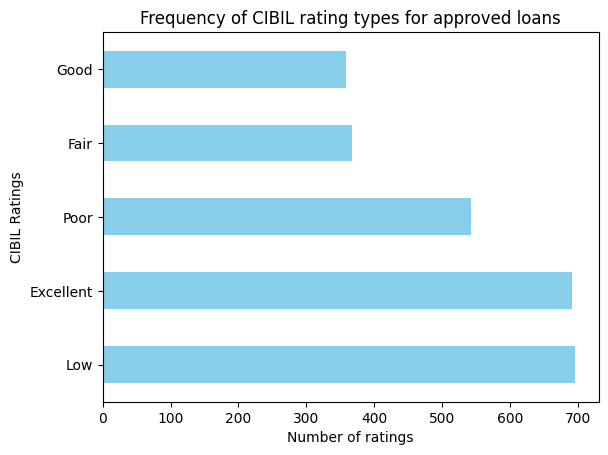

In [18]:
#Plot the frequency of cibil ratings for approved loans
approval_by_range.plot(kind='barh', color='skyblue')

# Add labels and title
plt.xlabel('Number of ratings')
plt.ylabel('CIBIL Ratings')
plt.title('Frequency of CIBIL rating types for approved loans')

# Show the plot
plt.show()

One may assume that the approved applicants' ratings would rank from best to worst in terms of frequency, but interestingly, the highest occurences are Low and Excellent.

In [19]:
#Let's look at the incomes of the applicants that had loans approved
approved_loans = data[data['loan_status'] == 0]

approved_loans.shape

(2656, 13)

In [20]:
# Use pd.cut() to bin 'income_annum' into income ranges
income_ranges = pd.cut(data['income_annum'], bins=[0, 100_000, 200_000, 400_000, 800_000, 2_000_000, 4_000_000, 6_000_000, float('inf')])

# Calculate the frequency of loan approvals within each income range
income_ranges_counts = approved_loans.groupby(income_ranges).size()

#Display the result
income_ranges_counts

/var/folders/5n/9y_q7ts15jj8n2k6y1lfcgjc0000gn/T/ipykernel_212/2703819842.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_ranges_counts = approved_loans.groupby(income_ranges).size()


income_annum
(0.0, 100000.0]              0
(100000.0, 200000.0]        29
(200000.0, 400000.0]        57
(400000.0, 800000.0]       117
(800000.0, 2000000.0]      329
(2000000.0, 4000000.0]     532
(4000000.0, 6000000.0]     534
(6000000.0, inf]          1058
dtype: int64

In [21]:
# Create a cross-tabulation (crosstab) between income ranges and employment status

income_employment_crosstab = pd.crosstab(index=income_ranges, columns=data['self_employed'])

# Display the result (0 = not self employed, 1 = self employed)
income_employment_crosstab

self_employed,0,1
income_annum,,
"(100000.0, 200000.0]",19,23
"(200000.0, 400000.0]",42,44
"(400000.0, 800000.0]",83,98
"(800000.0, 2000000.0]",258,242
"(2000000.0, 4000000.0]",415,450
"(4000000.0, 6000000.0]",457,444
"(6000000.0, inf]",845,849


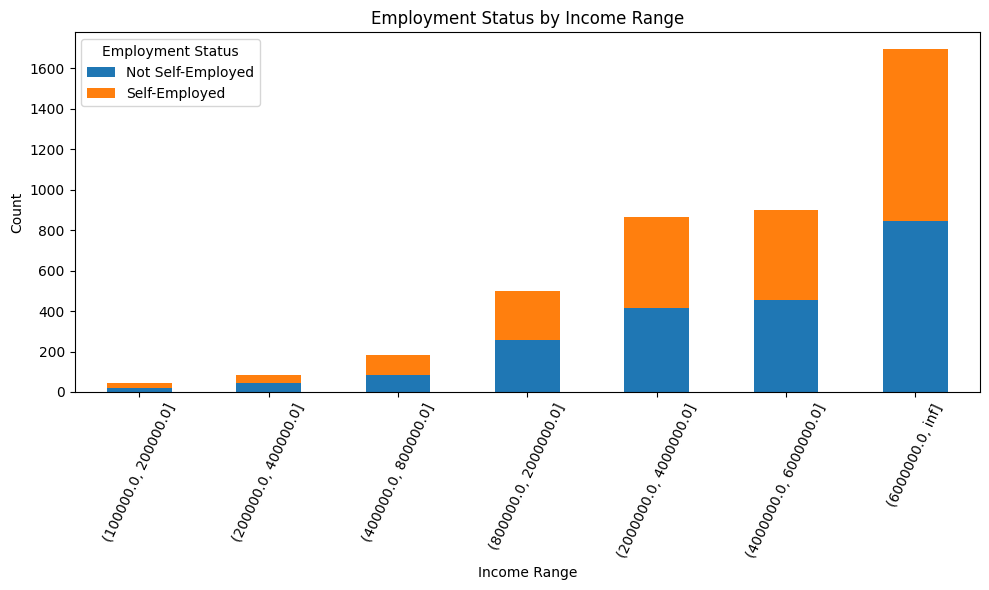

In [22]:
# Plot the stacked bar plot
income_employment_crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.title('Employment Status by Income Range')
plt.xlabel('Income Range')
plt.ylabel('Count')
plt.xticks(rotation=65)  # Rotate x-axis labels for better readability

# Show plot
plt.legend(title='Employment Status', labels=['Not Self-Employed', 'Self-Employed'])
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

This dataset contains applicants with very high incomes, overall. One may assume that applicants with very high incomes are self-employed, however, the data contains a pretty even split of self-employed and not self-employed applicants across the income ranges.

# Setting the X and y values

In [23]:
# Split the data into the column `y` we want to predict and the columns `X` we will use to make the predictions
X = data.drop(columns=['loan_status', 'cibil_range']) #drop the columns that we don't want to be used as features
y = data['loan_status'] #target variable - want to predict loan_status

# **Logistic Regression model**

In [24]:
# Set aside 25% of the data for testing the model and 75% for training
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [25]:
# Import a model class
from sklearn.linear_model import LogisticRegression

# Create a model from that class
lr = LogisticRegression(random_state=123)

# Ask the model to learn a function that predicts `y` from `X`
lr.fit(X_train, y_train)

LogisticRegression(random_state=123)

In [26]:
# Score the model on the test data
lr.score(X_test, y_test)

0.6348314606741573

In [27]:
# Let's review the impact of the features on the logistic regression model

# Retrieve the coefficients of the logistic regression model
coefficients = lr.coef_[0]

In [28]:
# Combine coefficients with column names
coef_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients})

# Sort the coefficients by absolute value to see which features have the most impact
coef_df['AbsoluteCoefficient'] = abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='AbsoluteCoefficient', ascending=False)

# Display the coefficients
coef_df

,Feature,Coefficient,AbsoluteCoefficient
3,income_annum,1.131462e-07,1.131462e-07
4,loan_amount,-4.940187e-08,4.940187e-08
8,commercial_assets_value,-1.733110e-08,1.733110e-08
10,bank_asset_value,-1.624385e-08,1.624385e-08
7,residential_assets_value,6.201564e-09,6.201564e-09
9,luxury_assets_value,-3.450420e-09,3.450420e-09
6,cibil_score,-1.091243e-09,1.091243e-09
0,no_of_dependents,-8.640398e-13,8.640398e-13
5,loan_term,-4.127026e-13,4.127026e-13
1,education,-2.292987e-13,2.292987e-13


#### Features which positively impact loan approval (i.e. improves likelihood of approval):
    1. Residential assets value 
    2. Income per annum

#### Features which negatively impact loan approval (i.e decreases the likelihood of approval):
    1. No. of dependents
    2. Loan amount
    3. Loan term

# **Fit a null model**

In [29]:
from sklearn.dummy import DummyClassifier

null_model = DummyClassifier(random_state = 123)
null_model.fit(X_train, y_train)

DummyClassifier(random_state=123)

In [30]:
#Get the null model's score on the test set
null_model.score(X_test, y_test)

0.6348314606741573

# Random Forest Classification Model

In [31]:
from sklearn.ensemble import RandomForestClassifier

#fit the Random Forest model
rfc = RandomForestClassifier(n_estimators=20, n_jobs=-1, random_state=123)
rfc.fit(X_train, y_train)

print('train score:', rfc.score(X_train, y_train))
print('test score:', rfc.score(X_test, y_test))

train score: 1.0
test score: 0.9765917602996255


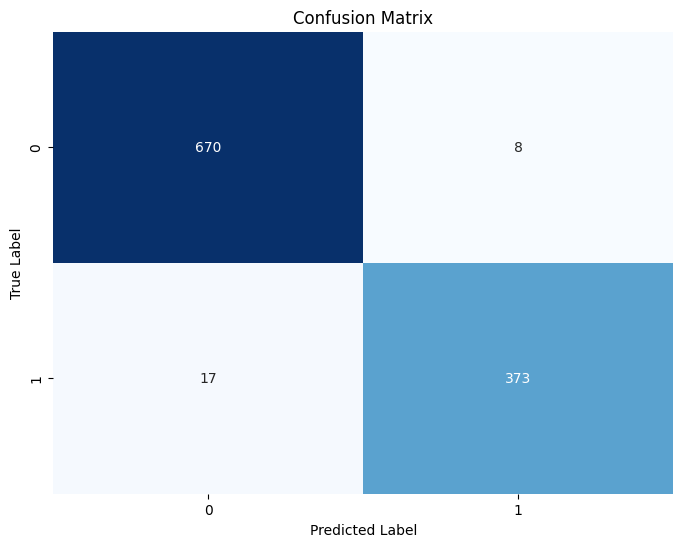

In [32]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get predicted values for the testing set
y_test_pred = rfc.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#### Confusion Matrix interpretation:
1. There were 8 instances where the model predicted 'Rejected' but actual was 'Approved'
2. There were 17 instances where the model predicted 'Approved' but actual was 'Rejected'

In [33]:
from sklearn import tree

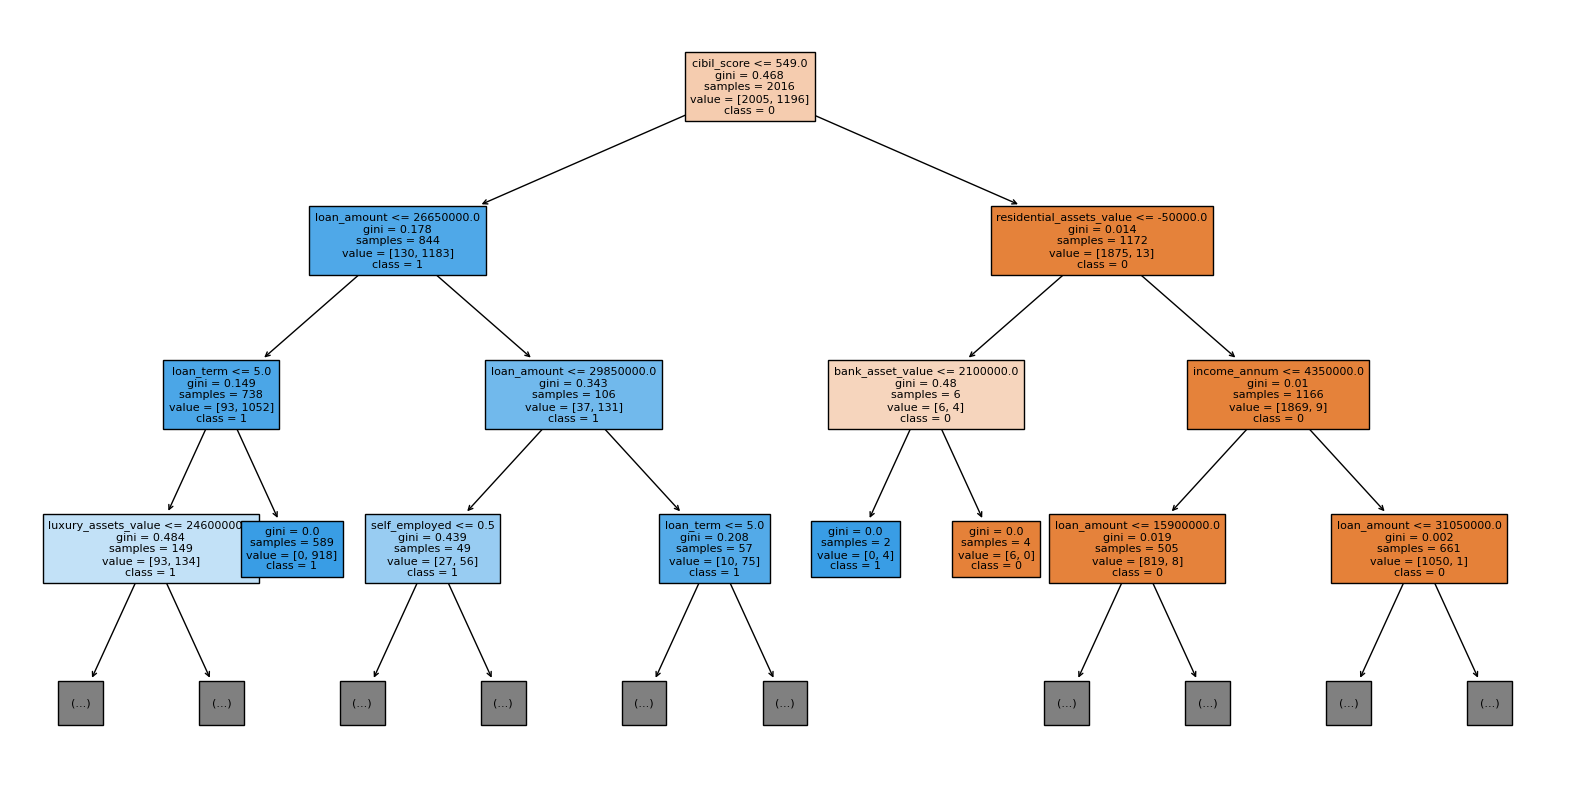

In [34]:
# Get one of the decision trees from the Random Forest classification model (e.g., the first tree)
tree_to_visualize = rfc.estimators_[0]

# Plot the decision tree (max_depth limited to 3 for readability)
plt.figure(figsize=(20, 10))  # Adjust figure size if needed
tree.plot_tree(tree_to_visualize, feature_names=X_train.columns, class_names=['0', '1'], filled=True, fontsize=8, max_depth=3)
plt.show()

It appears that RFC's 'first decision' is to categorise whether the cibil score is below 549 or not. If the applicant's score is above 549, the model will then go on to consider loan features (such as amount and term) before considering the applicants' assets and employment. If the applicant's score is below 549, the model will look at assets and income before considering loan features. This kind of 'thought process' is likely in line with a real world credit decisioning thought process whereby a financial institution may be happpy to proceed with loan application if a minimum credit score is met first, or if the minimum credit score is not met, the financial institution would then review what assets and income the applicant has in order to provide more conviction to the application.

#### Reasons why Random Forest is a better model in this situation:
1. Random Forest is a more complex model compared to logistic regression. It can capture nonlinear relationships and interactions between features more effectively, especially in high-dimensional (large number of features) data or nonlinear datasets.
2. Logistic regression treats all features equally unless feature selection techniques are applied seperately. Random Forest can focus on the most important features and handle irrelevant or redundant features.
3. Random Forest is less sensitive to outliers and noise in the data. Logistic regression is sensitive to outliers and may be influenced by them.
4. Random Forest is an ensemble learning method that combines multiple decision trees to make predictions i.e it takes the 'majority vote' of its constituent decision trees.

## Save the Random Forest Classification model

In [36]:
from joblib import dump, load

# Save the trained model
model_file = 'trained_rfc.joblib'
dump(rfc, model_file)

['trained_rfc.joblib']